In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 0, 'wavelength [nm]')

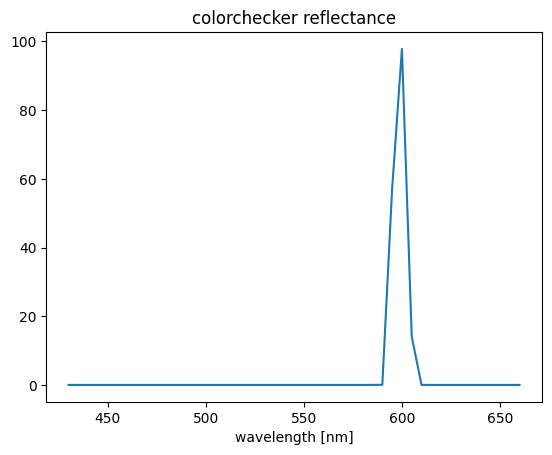

In [9]:
# Replace 'file.csv' with the path to your CSV file
wvl = np.arange(430, 661, 5)
band_pass_wvl = np.array([470,460,450,570 ,560, 550,620,610,600])
band_pass_transmission = np.zeros(shape=(len(band_pass_wvl), len(wvl)))

for k in range(len(band_pass_wvl)):
    file_path = './spectroradiometer/FBH%d-10.xlsx'%band_pass_wvl[k]

    df = pd.read_excel(file_path, sheet_name='FBH%d-10'%band_pass_wvl[k], engine='openpyxl')

    if band_pass_wvl[k] == 450:
        wvls = df.values[::10,0][::-1]
        wvls = [float(x) for x in wvls] 
        transmission = df.values[::10,2][::-1]
    else:
        # Display the DataFrame
        wvls = df.values[::5,0]
        wvls = [float(x) for x in wvls] 
        transmission = df.values[::5,2]

    band_pass_transmission[k] = transmission
    
plt.figure()
plt.plot(wvls, transmission)
plt.title('colorchecker reflectance')
plt.xlabel('wavelength [nm]')

In [10]:
np.save('band_pass_transmission.npy', band_pass_transmission)